In [8]:
import numpy as np
# import pandas as pd
from scipy.integrate import solve_ivp
from numba import njit
import matplotlib.pyplot as plt
# from matplotlib.animation import FuncAnimation
from matplotlib.colors import Normalize
# from matplotlib.animation import PillowWriter

In [9]:
#@njit
def RK4(N, x0, h, tmax):
    
    T=int(tmax/h)+1 
    t=np.linspace(0,tmax,T) 
    X=np.zeros((N,T))  
    X[:,0]=x0 
    h2=h/2 
    h6=h/6 
    
    for tt in range(1,T): 
    
        #Time dependent constants

        P=int(N/2-2)
        if P <= 165:
            omega = 1.097
        else:
            omega = np.sqrt(1 + (m*P)/((OMEGA**2-1+4*hh**2/(OMEGA**2-1))*(m*P+M)))
        
        r=m/(M+m*P)
                
        #Params to pass
        params = [N_max, r, omega, lamb, OMEGA, a, P]
    
        k1=func(X[:,tt-1], t[tt-1], params)
        k2=func(X[:,tt-1]+h2*k1, t[tt-1]+h2, params)
        k3=func(X[:,tt-1]+h2*k2, t[tt-1]+h2, params)
        k4=func(X[:,tt-1]+h*k3, t[tt-1]+h, params)
        X[:,tt]=X[:,tt-1]+h6*(k1+2*k2+2*k3+k4) #update the vector X according to the method
        
    return t,X

In [10]:
#@njit
def func(X, t, params):
    # X[0]=y
    # X[1]=vy
    # X[2:n+2]=xi
    # X[n+2:]=vxi
    
    #n is the number of max pedestrians, P is the number of pedestrian in the
    #current iteration
    n, r, omega, lamb, OMEGA, a, P = params
    
    fVP=lamb*(X[n+2:]**2+X[2:n+2]**2-a**2)*X[n+2:]+omega**2*X[2:n+2]
    suma=-np.sum(fVP)
    suma=(suma+P*(2*hh*X[1]+OMEGA**2*X[0]))/(1-P*r)
    
    F=np.zeros(len(X))
    
    F[0] = X[1]
    F[2:n+2] = X[n+2:]
    F[1] = -r*suma-2*hh*X[1]-OMEGA**2*X[0]
    F[n+2:] = -F[1]-fVP
    
    return F

In [11]:
#CONSTANTES DEL PUENTE
OMEGA = 1.2
lamb = 0.5
hh= 0.05
m = 70
M = 113000
a = 1

    
#CONSTANTES DEL ALGORITMO
t_max = 3000
h=0.1

No phase-locking: N=50

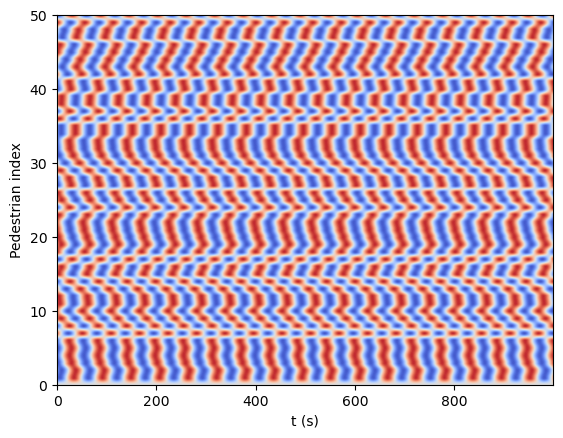

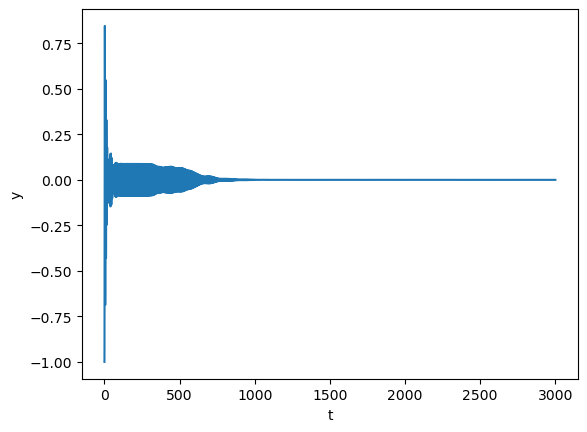

In [12]:
N_max = 50

#LAS CONDICIONES INICIALES
initial_conditions = np.zeros(2*N_max+2)
initial_conditions[0] = -1 #y(0)
#inicializamos las x de -1 a 1
initial_conditions[2:2+N_max] = 2*np.random.rand(N_max)-1 

t,X = RK4(2*N_max+2, initial_conditions, h, t_max)

first_map = X[1:, 20000:21000]
fig, ax = plt.subplots()
im = ax.imshow(first_map, cmap='coolwarm', aspect='auto', norm=Normalize(vmin=-1, vmax=1))
ax.set_xlabel('t (s)')
ax.set_ylabel('Pedestrian index')
ax.set_ylim(0, N_max)


fig2, ax2 = plt.subplots()
plt.plot(t, X[0])
ax2.set_ylabel("y")
ax2.set_xlabel("t")

plt.show()

Phase-locking: N=170

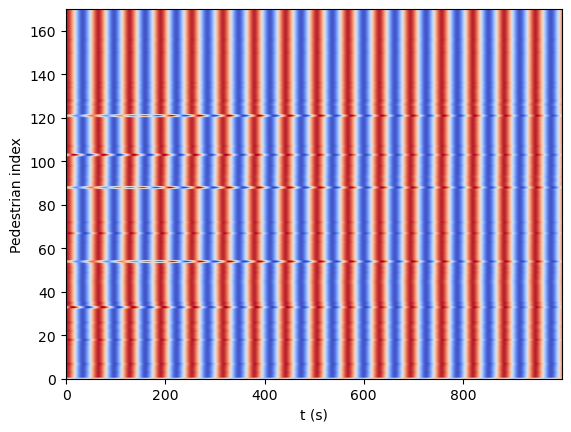

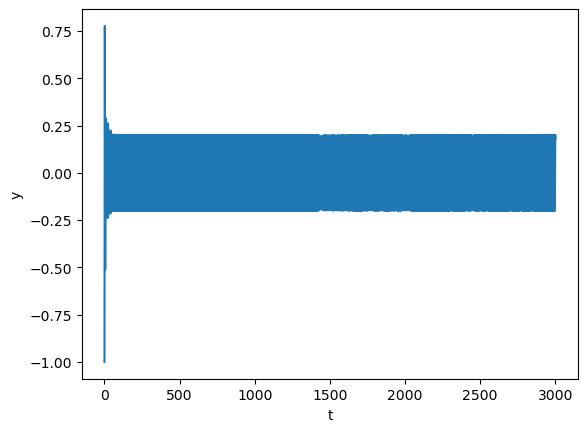

In [13]:
N_max = 170

#LAS CONDICIONES INICIALES
initial_conditions = np.zeros(2*N_max+2)
initial_conditions[0] = -1 #y(0)
#inicializamos las x de -1 a 1
initial_conditions[2:2+N_max] = 2*np.random.rand(N_max)-1 

t,X = RK4(2*N_max+2, initial_conditions, h, t_max)

second_map = X[1:, 20000:21000]
fig, ax = plt.subplots()
im = ax.imshow(second_map, cmap='coolwarm', aspect='auto', norm=Normalize(vmin=-1, vmax=1))
ax.set_xlabel('t (s)')
ax.set_ylabel('Pedestrian index')
ax.set_ylim(0, N_max)


fig2, ax2 = plt.subplots()
plt.plot(t, X[0])
ax2.set_ylabel("y")
ax2.set_xlabel("t")

plt.show()

Recreation of FIG. 3 TOP

In [7]:
n_pedestrians = np.arange(0, 300, 1)
amplitudes = []

for i in n_pedestrians:
    
    N_max = i
    #LAS CONDICIONES INICIALES
    initial_conditions = np.zeros(2*N_max+2)
    initial_conditions[0] = -1 #y(0)
    #inicializamos las x de -1 a 1
    initial_conditions[2:2+N_max] = 2*np.random.rand(N_max)-1 

    t,X = RK4(2*N_max+2, initial_conditions, h, t_max)
    
    amplitudes.append(np.nanmax(X[0, 15000:30000]))
    

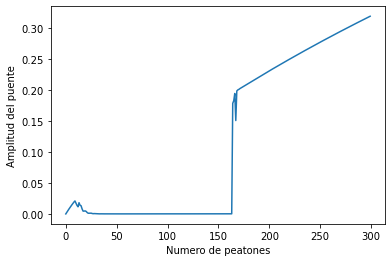

In [8]:
fig, ax = plt.subplots()
ax.set_xlabel('Numero de peatones')
ax.set_ylabel('Amplitud del puente')
plt.plot(n_pedestrians, amplitudes)